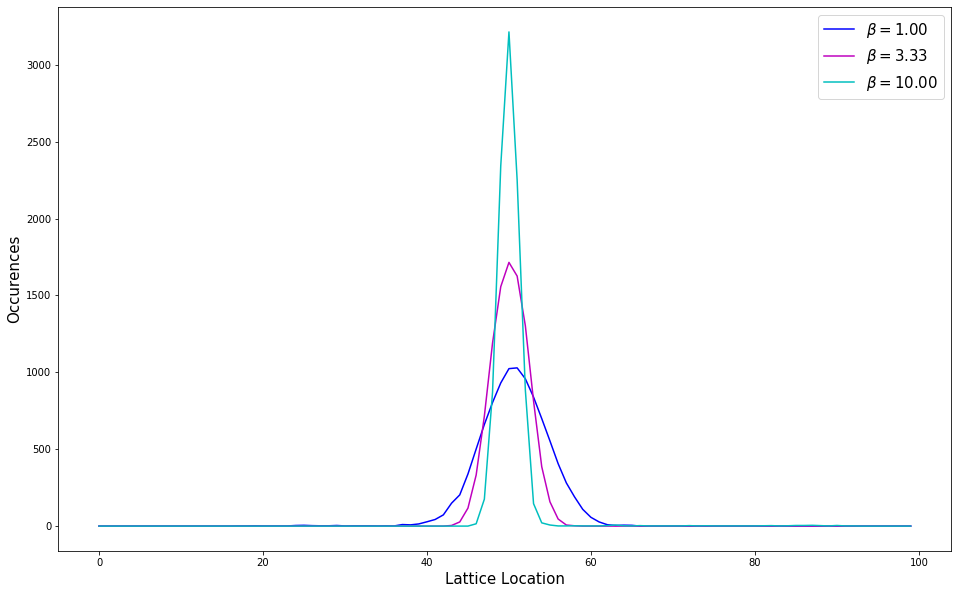

F average: 0.6364103190754791


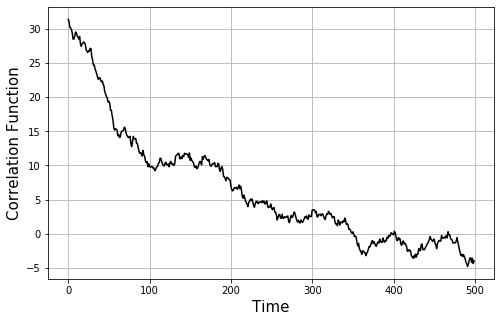

Tau = 113.89829137108579


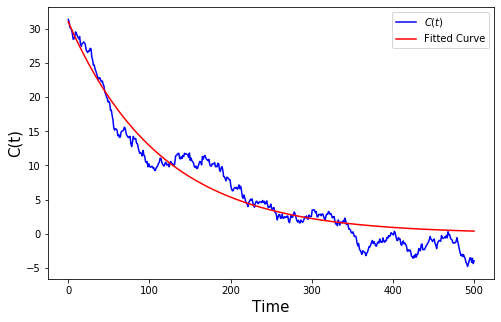

In [9]:
#Problem 2 Monte-Carlo Pendulum

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from numpy.random import choice, randint
from scipy.optimize import curve_fit


#******  Part A  ******

N_steps = 10000 #steps 
lat_points = 100 #Lattice size
B = np.array([1,3.333,10]) #Beta values
num_B = B.size #Size of beta array

#Define energy and force functions
def E(x):
    return -(50/np.pi)*np.cos(np.pi*(x-50)/(50))

def F(x):
    return -np.sin(np.pi*(x-50)/50)

#initialize array to store how many times a location is visited
counts = np.zeros((lat_points, num_B))

#initialize array to store energy values at each location
energy = np.zeros(lat_points)

# Fill energy array 
for i in range(lat_points):
    energy[i] = E(i)



def Monte_Carlo(N_steps, lat_points, energy, B , xmin = 0,xmax = 100, ret_x=False):
    # Choose random initial location 
    x = randint(xmin,xmax)
    counts = np.zeros(lat_points)
    position = np.zeros(N_steps)
    position[0] = x
    
    for i in range(N_steps):
        jump = np.random.choice([-1,1]) #decide to move left or right

        if x+jump > 99 or x+jump<1:
            x = x #stays the same if at the edge of the boundary
        else: 
            prob = np.exp(-(energy[x+jump] - energy[x])*B)
            if np.random.random() < prob:
                x = x + jump # move to new position
        counts[x] += 1
        position[i] = x
    if ret_x:
        return position
    
    return counts


# Store the number of counts at a given location for each value of beta
for i_beta in range(num_B):
    counts[:,i_beta] = Monte_Carlo(N_steps,lat_points,energy, B[i_beta], xmin=0, xmax=100)


#plotting routine 
colors = ['b','m','c']
plt.figure(figsize=(16, 10))
for k in range(num_B):
   plt.plot(counts[:,k], label=r'$\beta=%0.2f$'%B[k],color = colors[k])
    
plt.legend(prop={'size': 15})
plt.xlabel('Lattice Location', size= 15)
plt.ylabel('Occurences', size = 15)
plt.show()


# ******  Part B  ******


#Compute magnitude of average force
force_sum = 0.
for i in range(lat_points):
    force_sum += abs(F(i))
avg_force = force_sum/float(lat_points)
print('F average:',avg_force)    

#******  Part C  ******

runs = 200
t_steps = 500 
lat_points = 100
beta = 0.3

#initialize array to store correlation function for each run at each t step
C = np.zeros((runs,t_steps))
#initialize array to store correlation function at each t averaged over 200 runs
avg_C = np.zeros(t_steps)

#Runs Monte Carlo 200 times,for each t_step x has a certain position, and C stores the value of the correlation 
#function for that given time which is a function of position at that time

for i_runs in range(runs):
    x = Monte_Carlo(t_steps, lat_points, energy, beta, xmin = 40, xmax = 60, ret_x=True)
    for i_steps in range(t_steps):
        C[i_runs,i_steps] = (x[0]-50)*(x[i_steps]-50)

#average of each column --- averaging over the 200 runs
avg_C = C.mean(axis=0)

#plot
plt.figure(figsize=(8,5))
plt.xlabel('Time', size = 15)
plt.ylabel('Correlation Function', size = 15)
plt.plot(avg_C, color = 'k')
plt.grid()
plt.show()

#****** Part C  ******

def func(x, c, T):
    return c*np.exp(-x/T)

t = np.linspace(0,500,t_steps)
var_est, pcov = curve_fit(func, t, avg_C)
print("Tau =", var_est[1])

plt.figure(figsize=(8, 5))
plt.xlabel('Time', size = 15)
plt.ylabel(r'C(t)', size=15)
plt.plot(t, avg_C, label=r'$C(t)$', color = 'b')
plt.plot(t, func(t, *var_est), label="Fitted Curve", color = 'r')
plt.legend()
plt.show()



    
    




